In [2]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sqlite3

In [6]:
def diff_smooth(x, n):
    a = np.zeros_like(x)
    for i in range(len(x)-n):
        i += n
        a[i] = np.nanmean(x[i:i+n], axis=0) - np.nanmean(x[i-n:i], axis=0)
    return a

In [3]:
candidates = ['sanders', 'clinton', 'cruz', 'trump']

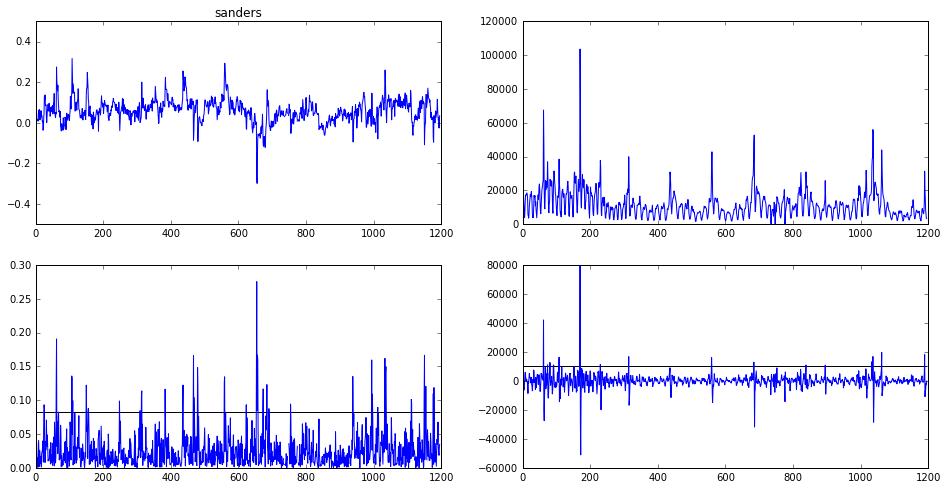

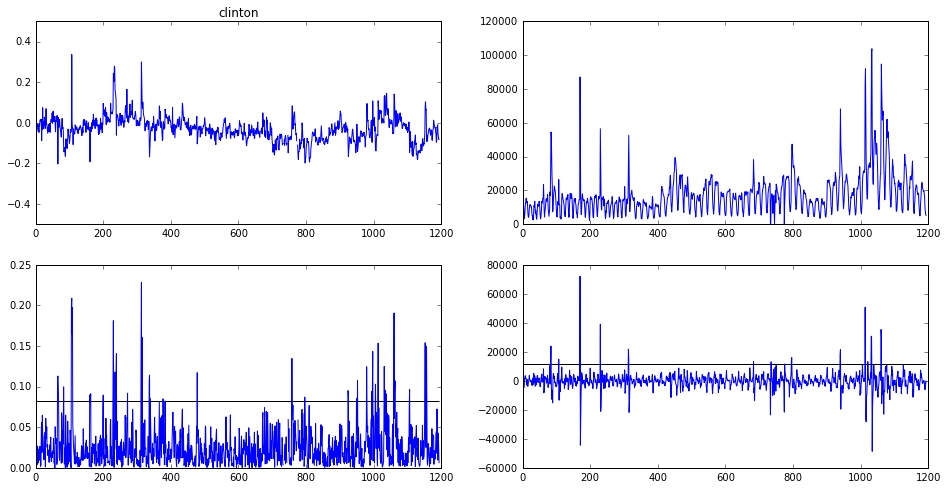

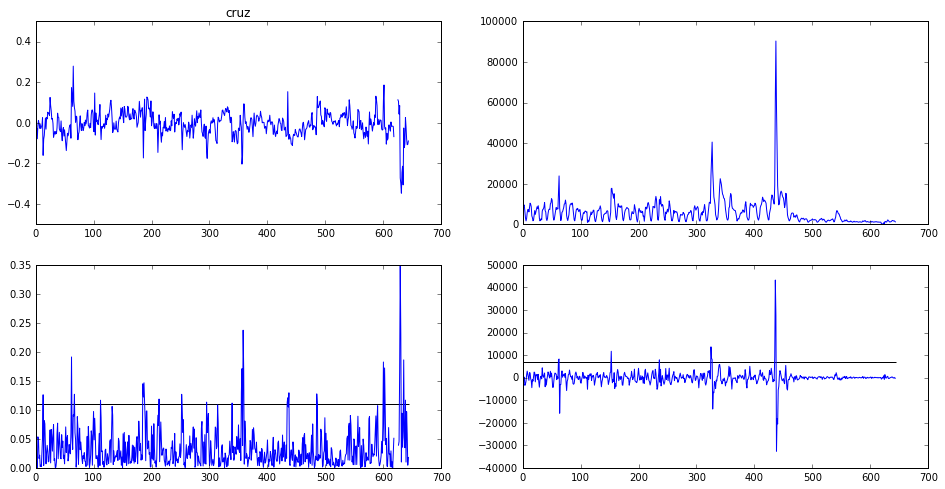

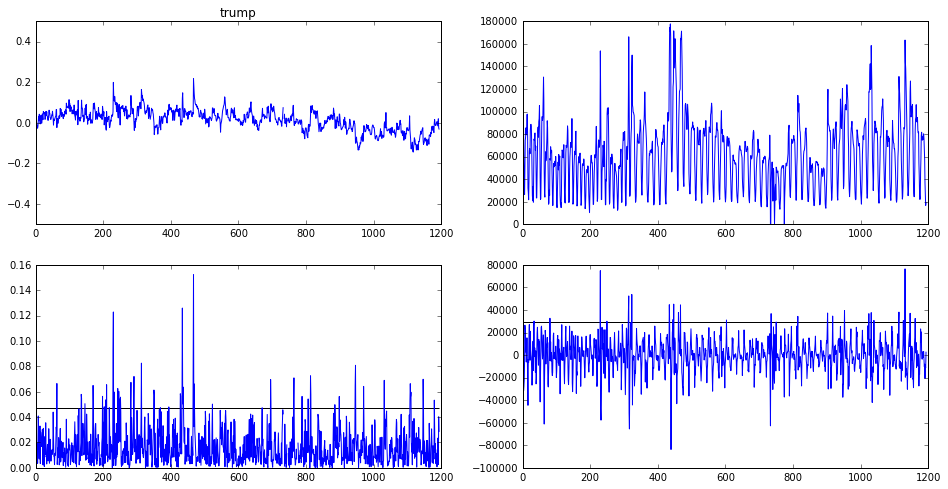

In [27]:
for candidate in candidates:
    conn = sqlite3.connect('../data backup/data_downsampled.sqlite')
    c = conn.cursor()
    c.execute('''SELECT * FROM '''+candidate+''' WHERE datetime > 1459456469;''')
    rows = c.fetchall()
    conn.close()
    
    rows = np.array(rows).astype(np.float32)
    
    # calculate derivative of sentiment and tweets per bin
    data_diff = rows.copy()
    data_diff[:,1] = np.abs(diff_smooth(rows[:,1], 2))
    data_diff[:,2] = diff_smooth(rows[:,2], 1)

    # get peaks above a threshold
#     sentiment_diff_threshold = np.std(data_diff[:,1])*1.5
#     tps_diff_threshold = np.std(data_diff[:,2])*1.5
#     sentiment_diff_peaks = get_peaks(data_diff[:,[0,1]], sentiment_diff_threshold)
#     tps_diff_peaks = get_peaks(data_diff[:,[0,2]], tps_diff_threshold)
    
    plt.figure(figsize=(16,8))
    plt.subplot(221)
    plt.title(candidate)
    plt.plot(rows[:,1])
    plt.ylim([-0.5,0.5])
    plt.subplot(222)
    plt.plot(rows[:,2])
    plt.subplot(223)
    plt.plot(data_diff[:,1])
    plt.hlines(np.nanstd(data_diff[:,1])*3, 0, len(data_diff[:,1]))
    plt.subplot(224)
    plt.plot(data_diff[:,2])
    plt.hlines(np.nanstd(data_diff[:,2])*2, 0, len(data_diff[:,2]))
    plt.show()